<a href="https://colab.research.google.com/github/Abhay182005dat/My_TensorFlow_Learning/blob/main/Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
X , y = make_moons(100 , noise = 0.25 , random_state=42)

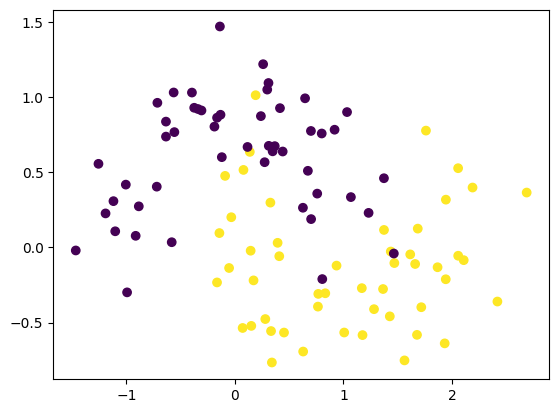

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [ ]:
model1 = Sequential()
model1.add(Dense(128,input_dim=2,activation='relu'))
model1.add(Dense(128,activation='relu'))
model1.add(Dense(1,activation='sigmoid'))

model1.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
adam = Adam(learning_rate = 0.01)
model1.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])

history = model1.fit(X,y,epochs=2000,validation_split=0.2,verbose=1)

Epoch 1/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 152ms/step - accuracy: 0.6047 - loss: 0.6297 - val_accuracy: 0.8000 - val_loss: 0.4511
Epoch 2/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.8492 - loss: 0.3601 - val_accuracy: 0.8000 - val_loss: 0.4614
Epoch 3/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8531 - loss: 0.3451 - val_accuracy: 0.8000 - val_loss: 0.5023
Epoch 4/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8492 - loss: 0.3226 - val_accuracy: 0.8000 - val_loss: 0.4358
Epoch 5/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.8969 - loss: 0.2665 - val_accuracy: 0.8000 - val_loss: 0.4230
Epoch 6/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8969 - loss: 0.2441 - val_accuracy: 0.8000 - val_loss: 0.3786
Epoch 7/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9086 - loss: 0.2260 - val_accuracy: 0.8000 - val_loss: 0.3866
Epoch 8/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8750 - loss: 0.2717 - val_accuracy: 0.8000 - 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 9s 970us/step


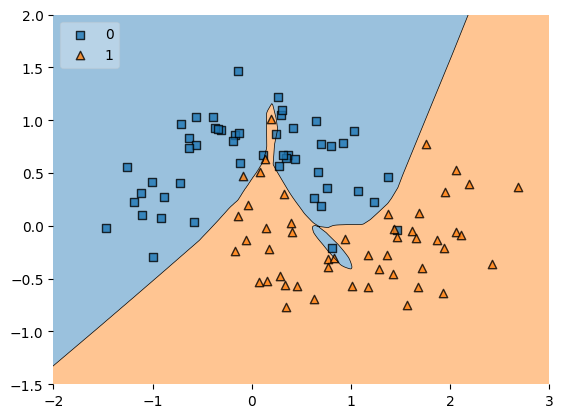

In [ ]:
plot_decision_regions(X , y.astype('int') , clf=model1 , legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

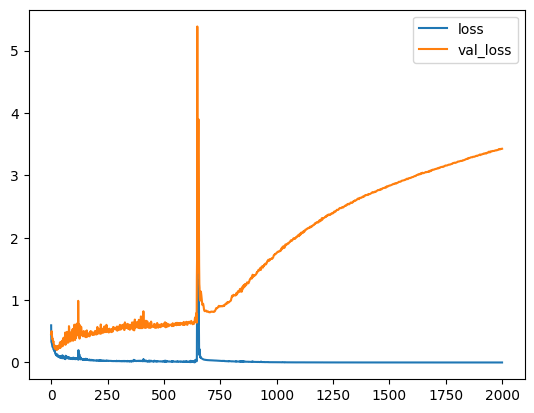

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.show()

In [ ]:
model2 = Sequential()
model2.add(Dense(128,input_dim=2,activation='relu'))
model2.add(Dense(128,activation='relu', kernel_regularizer=tensorflow.keras.regularizers.l2(0.03)))
model2.add(Dense(1,activation='sigmoid')) # 0.03 is lambda value

model2.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
adam = Adam(learning_rate = 0.01)
model2.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])

history2 = model2.fit(X,y,epochs=2000,validation_split=0.2,verbose=1)

Epoch 1/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.5688 - loss: 4.1586 - val_accuracy: 0.8000 - val_loss: 2.6124
Epoch 2/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8227 - loss: 2.3672 - val_accuracy: 0.8000 - val_loss: 1.4717
Epoch 3/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8492 - loss: 1.2986 - val_accuracy: 0.8000 - val_loss: 0.8770
Epoch 4/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8609 - loss: 0.7394 - val_accuracy: 0.8000 - val_loss: 0.6484
Epoch 5/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8672 - loss: 0.5249 - val_accuracy: 0.8000 - val_loss: 0.5918
Epoch 6/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8687 - loss: 0.4471 - val_accuracy: 0.8000 - val_loss: 0.5893
Epoch 7/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8469 - loss: 0.4891 - val_accuracy: 0.8000 - val_loss: 0.5877
Epoch 8/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8508 - loss: 0.5412 - val_accuracy: 0.8000 - v

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 8s 839us/step


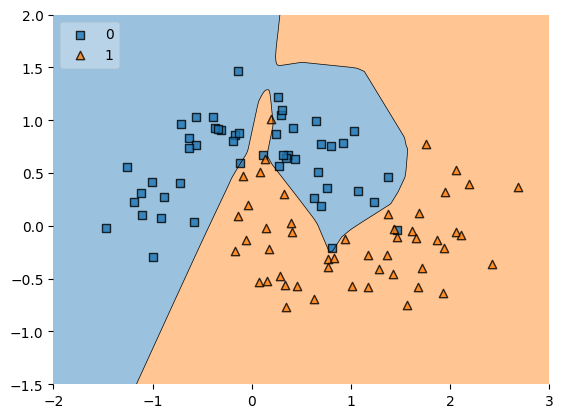

In [14]:
plot_decision_regions(X,y.astype('int') , clf=model2 , legend = 2 )
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

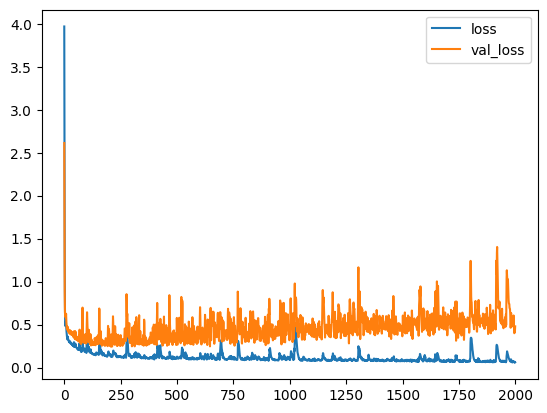

In [15]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.show()

> We can see there os comparitively less overfitting because of regularization.

In [16]:
model1_weight_layer1 = model1.get_weights()[0].reshape(256) # 2 features * 128
model2_weight_layer1 = model2.get_weights()[0].reshape(256)

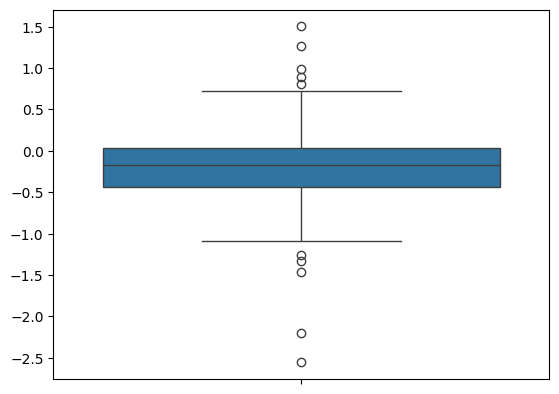

In [17]:
sns.boxplot(model1_weight_layer1)
plt.show()

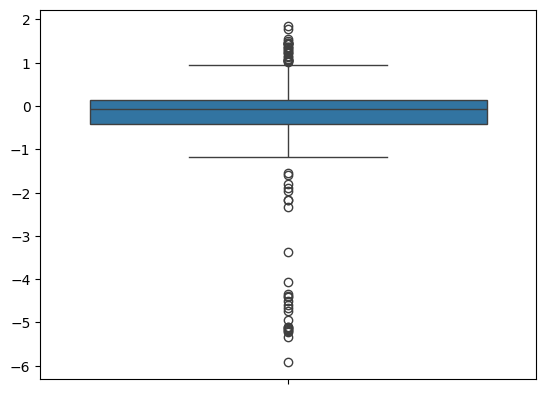

In [21]:
sns.boxplot(model2_weight_layer1)
plt.show()

In [20]:
model1.get_weights()[0].shape # 2 input features weights with 128 neurons in 1st layer


(2, 128)